In [1]:
## importing the libraries 

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 #computer vision for image recognition tasks 

from PIL import Image
import tensorflow as tf

tf.random.set_seed(32)


from tensorflow import keras
from keras.datasets import mnist 


from tensorflow.math import confusion_matrix 

In [2]:
## load the mnist data 

(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays 

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)



(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
## printing the 10th image

print(X_train[10]) # all the values range between 0-255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
X_train[10].shape

(28, 28)

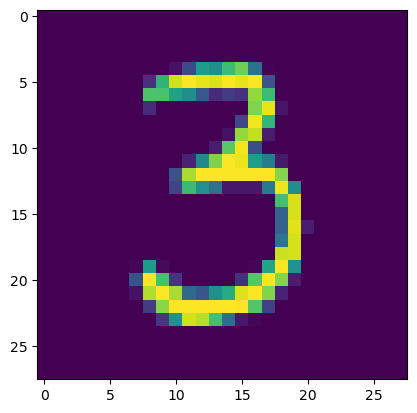

3


In [7]:
## displaying the image 

plt.imshow(X_train[50])

plt.show()


## print the corresponding label 

print(Y_train[50])

In [8]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
## scaling the values instead from 0-255 ---> 0-1

X_train = X_train/255
X_test = X_test/ 255

In [10]:
# setting up the layers of neural network 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  
])

C:\Users\HP-PC\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
## compiling the neural network 


model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])


In [15]:
## training the neural network 

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9519 - loss: 0.1602
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9658 - loss: 0.1138
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9733 - loss: 0.0874
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9785 - loss: 0.0699
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0564
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9867 - loss: 0.0472
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0392
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0342
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0302
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0283


In [16]:
## checking for test data 

loss , accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9629 - loss: 0.1431


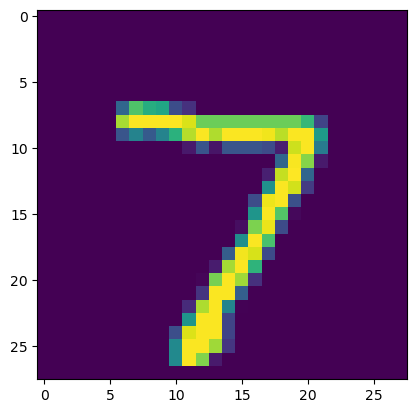

In [17]:
## first data point in X_test 

plt.imshow(X_test[0])
plt.show()

In [18]:
Y_test[0]

7

In [19]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


In [20]:
Y_pred.shape

(10000, 10)

In [21]:
Y_pred[0]

array([1.8447957e-06, 8.5312247e-02, 8.8788700e-01, 9.9739337e-01,
       4.8598181e-08, 2.9836964e-02, 2.8922638e-13, 9.9999994e-01,
       4.4646603e-01, 7.7460551e-01], dtype=float32)

In [24]:
 ## converting the prediction probablities to class label 
label_for_first_test_img = np.argmax(Y_pred[0])

print(label_for_first_test_img)
    

7


In [25]:
## converting the prediction probs to class label for all the data points 


Y_pred_labels = [np.argmax(i) for i in Y_pred]


print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 8, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 3, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 3, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 3, 4, 3, 3, 0, 0, 3, 1, 3, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
## Confusion Matrix 

In [27]:
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)

print(conf_matrix)

tf.Tensor(
[[ 971    0    3    2    1    1    1    1    0    0]
 [   0 1126    4    0    0    0    2    1    2    0]
 [   3    4 1001   12    1    1    2    5    3    0]
 [   0    0    3  989    0    5    0    7    6    0]
 [   2    0    5    2  954    0    3    2    0   14]
 [   3    1    0   16    2  859    6    0    5    0]
 [   6    3    2    1    3   10  927    0    6    0]
 [   3    2    7   11    1    2    0  997    2    3]
 [   4    0    6   14    3    5    3    3  934    2]
 [   6    5    1   21    7    8    0    6    3  952]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predict Labels')

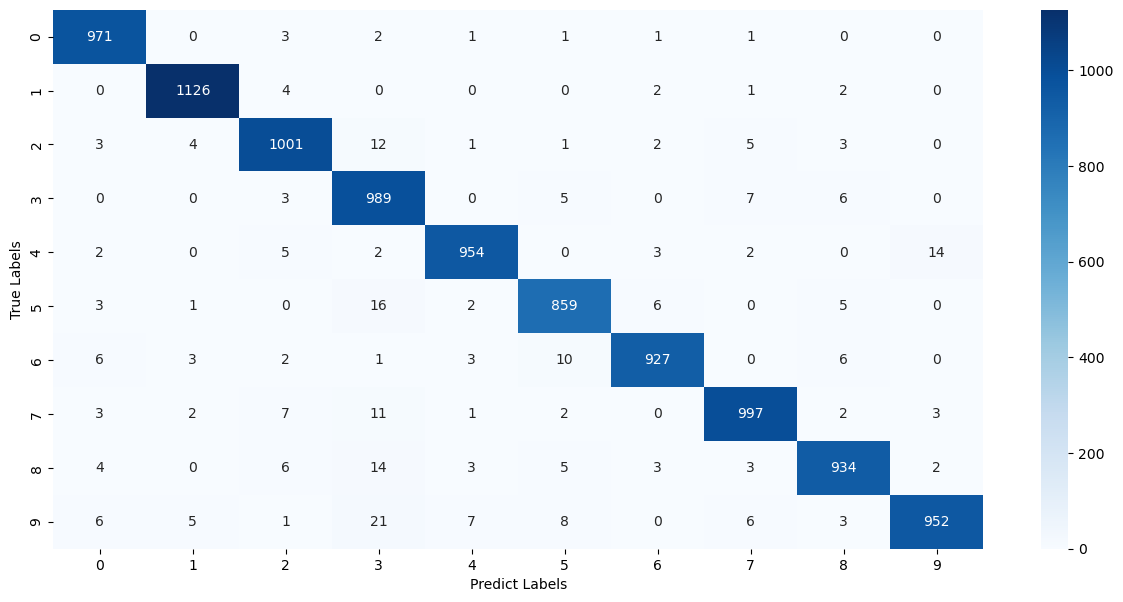

In [30]:
plt.figure(figsize= (15, 7))

sns.heatmap(conf_matrix, annot =True, fmt='d', cmap='Blues')

plt.ylabel("True Labels")
plt.xlabel("Predict Labels")